In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/home/rajarajan/Desktop/LIL CODE/dataset/heart.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Assuming the target variable is named 'HeartDisease' and the rest are features
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numeric data
scaler = StandardScaler()

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include='number').columns

# Fit the scaler on the training data and transform both training and testing data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Display the transformed data
print(X_train.head())
print(X_test.head())



   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
795 -1.245067   M           NAP  -0.708985     0.372803   1.842609     Normal   
25  -1.886236   M           NAP  -0.166285   

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


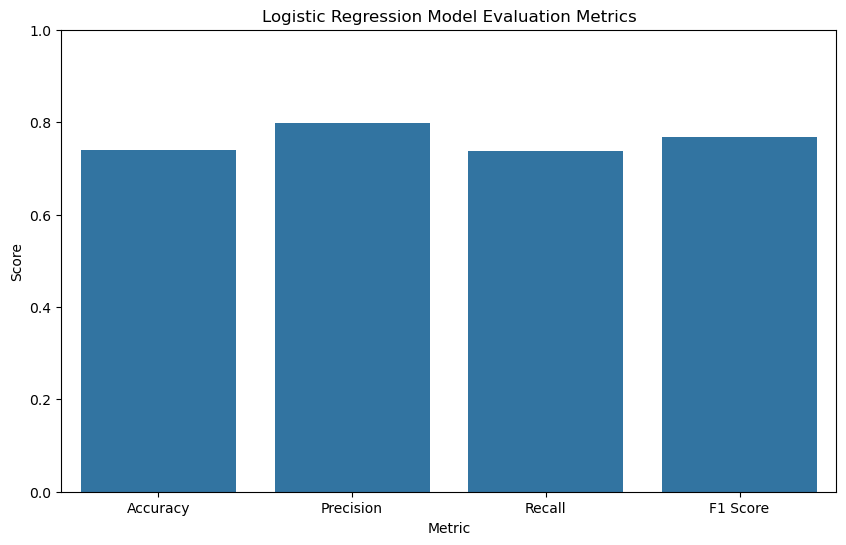

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/home/rajarajan/Desktop/LIL CODE/dataset/heart.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Assuming the target variable is named 'HeartDisease' and the rest are features
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numeric data
scaler = StandardScaler()

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include='number').columns

# Fit the scaler on the training data and transform both training and testing data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Convert back to DataFrame for easy plotting
X_train_df = pd.DataFrame(X_train, columns=numeric_cols)
X_test_df = pd.DataFrame(X_test, columns=numeric_cols)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_df, y_train)

# Make predictions
y_pred = model.predict(X_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics in a bar chart
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.ylim(0, 1)
plt.title('Logistic Regression Model Evaluation Metrics')
plt.show()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


/home/rajarajan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rajarajan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rajarajan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rajarajan/.loca

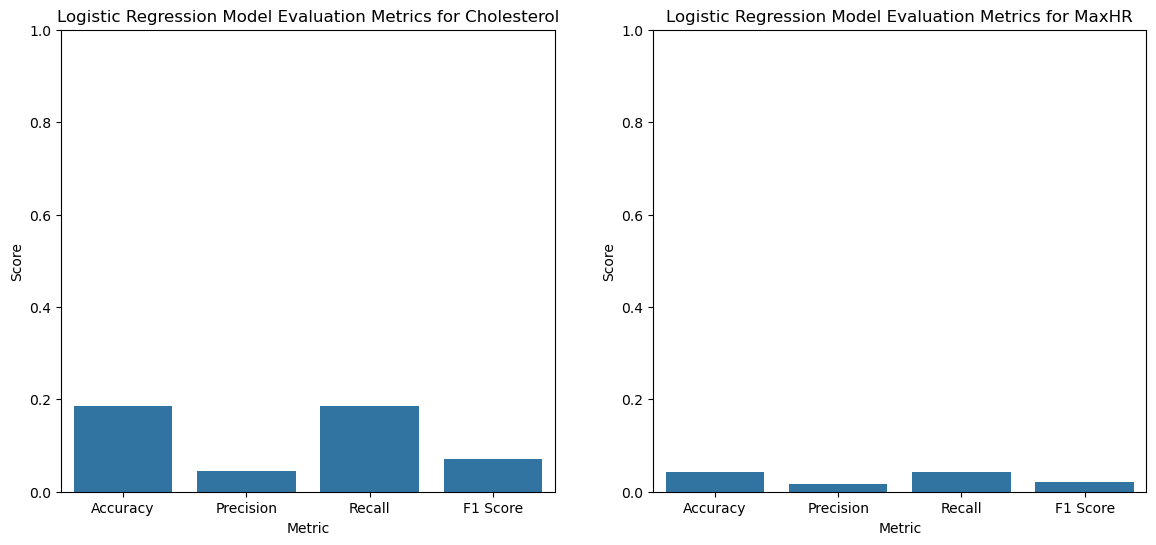

Accuracy for Cholesterol: 18.48%
Accuracy for MaxHR: 4.35%


In [7]:
#Logistic Regression

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/home/rajarajan/Desktop/LIL CODE/dataset/heart.csv")

# Display the first few rows of the DataFrame
print(data.head())

# Set the features (X) and the new target variable(s)
X = data.drop(['Cholesterol', 'MaxHR'], axis=1)
y_chol = data['Cholesterol']
y_maxhr = data['MaxHR']

# Split the dataset into training and testing sets for Cholesterol
X_train_chol, X_test_chol, y_train_chol, y_test_chol = train_test_split(X, y_chol, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets for MaxHR
X_train_maxhr, X_test_maxhr, y_train_maxhr, y_test_maxhr = train_test_split(X, y_maxhr, test_size=0.2, random_state=42)

# Normalize the numeric data
scaler = StandardScaler()

# Identify numeric columns
numeric_cols = X_train_chol.select_dtypes(include='number').columns

# Fit the scaler on the training data and transform both training and testing data for Cholesterol
X_train_chol[numeric_cols] = scaler.fit_transform(X_train_chol[numeric_cols])
X_test_chol[numeric_cols] = scaler.transform(X_test_chol[numeric_cols])

# Fit the scaler on the training data and transform both training and testing data for MaxHR
X_train_maxhr[numeric_cols] = scaler.fit_transform(X_train_maxhr[numeric_cols])
X_test_maxhr[numeric_cols] = scaler.transform(X_test_maxhr[numeric_cols])

# Convert back to DataFrame for easy plotting
X_train_chol_df = pd.DataFrame(X_train_chol, columns=numeric_cols)
X_test_chol_df = pd.DataFrame(X_test_chol, columns=numeric_cols)
X_train_maxhr_df = pd.DataFrame(X_train_maxhr, columns=numeric_cols)
X_test_maxhr_df = pd.DataFrame(X_test_maxhr, columns=numeric_cols)

# Train a logistic regression model for Cholesterol (if you want to perform regression)
model_chol = LogisticRegression()
model_chol.fit(X_train_chol_df, y_train_chol)

# Train a logistic regression model for MaxHR (if you want to perform regression)
model_maxhr = LogisticRegression()
model_maxhr.fit(X_train_maxhr_df, y_train_maxhr)

# Make predictions for Cholesterol
y_pred_chol = model_chol.predict(X_test_chol_df)

# Make predictions for MaxHR
y_pred_maxhr = model_maxhr.predict(X_test_maxhr_df)

# Evaluate the model for Cholesterol
accuracy_chol = accuracy_score(y_test_chol, y_pred_chol)
precision_chol = precision_score(y_test_chol, y_pred_chol, average='weighted')
recall_chol = recall_score(y_test_chol, y_pred_chol, average='weighted')
f1_chol = f1_score(y_test_chol, y_pred_chol, average='weighted')

# Evaluate the model for MaxHR
accuracy_maxhr = accuracy_score(y_test_maxhr, y_pred_maxhr)
precision_maxhr = precision_score(y_test_maxhr, y_pred_maxhr, average='weighted')
recall_maxhr = recall_score(y_test_maxhr, y_pred_maxhr, average='weighted')
f1_maxhr = f1_score(y_test_maxhr, y_pred_maxhr, average='weighted')

# Display the evaluation metrics in bar charts for both Cholesterol and MaxHR
metrics_chol = {
    'Accuracy': accuracy_chol,
    'Precision': precision_chol,
    'Recall': recall_chol,
    'F1 Score': f1_chol
}

metrics_maxhr = {
    'Accuracy': accuracy_maxhr,
    'Precision': precision_maxhr,
    'Recall': recall_maxhr,
    'F1 Score': f1_maxhr
}

metrics_chol_df = pd.DataFrame(list(metrics_chol.items()), columns=['Metric', 'Score'])
metrics_maxhr_df = pd.DataFrame(list(metrics_maxhr.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Metric', y='Score', data=metrics_chol_df)
plt.ylim(0, 1)
plt.title('Logistic Regression Model Evaluation Metrics for Cholesterol')

plt.subplot(1, 2, 2)
sns.barplot(x='Metric', y='Score', data=metrics_maxhr_df)
plt.ylim(0, 1)
plt.title('Logistic Regression Model Evaluation Metrics for MaxHR')

plt.show()

accuracy_chol_percentage = accuracy_chol * 100
accuracy_maxhr_percentage = accuracy_maxhr * 100
print(f"Accuracy for Cholesterol: {accuracy_chol_percentage:.2f}%")
print(f"Accuracy for MaxHR: {accuracy_maxhr_percentage:.2f}%")

Accuracy of the model: -13.95%


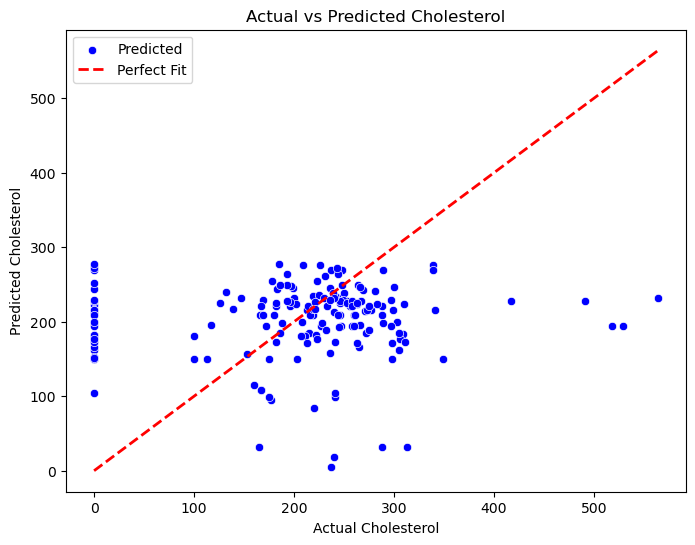

In [9]:
#Randome forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/home/rajarajan/Desktop/LIL CODE/dataset/heart.csv'  
heart_df = pd.read_csv(file_path)

# Select the features (MaxHR) and target (Cholesterol)
X = heart_df[['MaxHR']]
y = heart_df['Cholesterol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Convert R² score to a percentage
accuracy_percentage = r2 * 100
print(f'Accuracy of the model: {accuracy_percentage:.2f}%')

# Set up the plot
plt.figure(figsize=(8, 6))



# Scatter plot of actual vs predicted Cholesterol
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')
plt.title('Actual vs Predicted Cholesterol')
plt.legend()

# Show the plot
plt.show()


Accuracy of the model: -17.64%


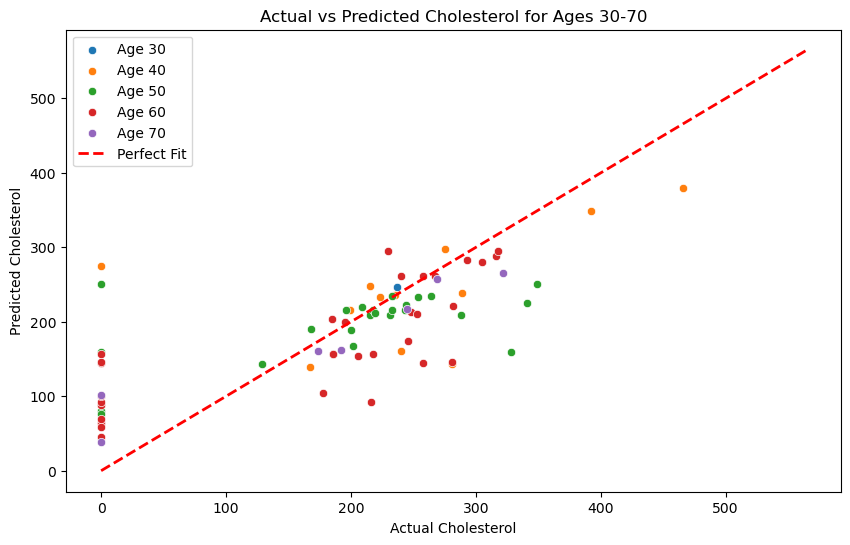

In [3]:
#Random forest with the age classification

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/home/rajarajan/Desktop/LIL CODE/dataset/heart.csv'  
heart_df = pd.read_csv(file_path)

# Define a function to calculate the max heart rate threshold based on age
def calculate_max_hr(age):
    return 220 - age

# Apply threshold to classify if MaxHR is normal (below calculated threshold) or above normal
heart_df['MaxHR_Normal'] = heart_df.apply(lambda row: 1 if row['MaxHR'] <= calculate_max_hr(row['Age']) else 0, axis=1)

# Classify age into categories
def classify_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age <= 60:
        return 'Middle-Aged'
    else:
        return 'Elderly'

# Create a new column for age category
heart_df['Age_Group'] = heart_df['Age'].apply(classify_age)

# One-hot encoding for age group categorical feature
heart_df = pd.get_dummies(heart_df, columns=['Age_Group'], drop_first=True)

# Select the features (MaxHR_Normal, Age, Age_Group categories) and target (Cholesterol)
# Note: 'Age_Group_Elderly' is excluded because it's not present in the dataset
X = heart_df[['MaxHR', 'MaxHR_Normal', 'Age', 'Age_Group_Middle-Aged', 'Age_Group_Young']]
y = heart_df['Cholesterol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Convert R² score to a percentage
accuracy_percentage = r2 * 100
print(f'Accuracy of the model: {accuracy_percentage:.2f}%')

# Function to create plots for different age groups
def plot_maxhr_predictions_for_age_range(start_age, end_age, increment=10):
    plt.figure(figsize=(10, 6))
    for age in range(start_age, end_age + 1, increment):
        # Filter data by age range
        age_group_data = heart_df[heart_df['Age'] == age]
        X_age_group = age_group_data[['MaxHR', 'MaxHR_Normal', 'Age', 'Age_Group_Middle-Aged', 'Age_Group_Young']]
        y_age_group = age_group_data['Cholesterol']
        
        if not age_group_data.empty:
            # Predict for the current age group
            y_pred_age = rf_regressor.predict(X_age_group)
            
            # Scatter plot of actual vs predicted Cholesterol for this age group
            sns.scatterplot(x=y_age_group, y=y_pred_age, label=f'Age {age}', marker='o')
    
    # Line representing perfect predictions
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
    
    # Add labels and title
    plt.xlabel('Actual Cholesterol')
    plt.ylabel('Predicted Cholesterol')
    plt.title(f'Actual vs Predicted Cholesterol for Ages {start_age}-{end_age}')
    plt.legend()
    plt.show()

# Plot MaxHR predictions for ages 30 to 70, with a difference of 10 years
plot_maxhr_predictions_for_age_range(30, 70, increment=10)


Dataset loaded successfully.
Available columns after encoding: Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'MaxHR_Normal',
       'Age_Group_Middle-Aged', 'Age_Group_Young', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')
Accuracy of the model: -15.44%


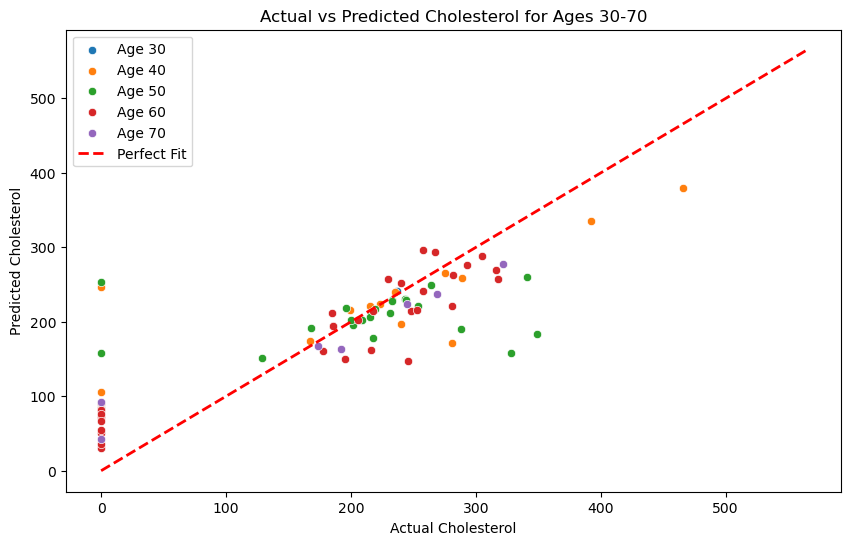

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
file_path = '/home/rajarajan/Desktop/LIL /dataset/heart.csv'
try:
    heart_df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found. Please check the path and try again.")

# Define a function to calculate the max heart rate threshold based on age
def calculate_max_hr(age):
    return 220 - age

# Apply threshold to classify if MaxHR is normal (below calculated threshold) or above normal
heart_df['MaxHR_Normal'] = heart_df.apply(lambda row: 1 if row['MaxHR'] <= calculate_max_hr(row['Age']) else 0, axis=1)

# Classify age into categories
def classify_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age <= 60:
        return 'Middle-Aged'
    else:
        return 'Elderly'

# Create a new column for age category
heart_df['Age_Group'] = heart_df['Age'].apply(classify_age)

# One-hot encoding for age group and other categorical features
heart_df = pd.get_dummies(heart_df, columns=['Age_Group', 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Check the available columns after encoding
print("Available columns after encoding:", heart_df.columns)

# Update the feature list based on available columns
available_columns = heart_df.columns

# Select only the available columns for X
features = ['MaxHR', 'MaxHR_Normal', 'Age'] + [
    col for col in ['Age_Group_Middle-Aged', 'Age_Group_Young',
                    'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                    'RestingECG_LVH', 'RestingECG_Normal', 
                    'ST_Slope_Flat', 'ST_Slope_Up'] if col in available_columns
]

# Prepare X and y based on the available columns
X = heart_df[features]
y = heart_df['Cholesterol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Convert R² score to a percentage
accuracy_percentage = r2 * 100
print(f'Accuracy of the model: {accuracy_percentage:.2f}%')

# Function to create plots for different age ranges
def plot_maxhr_predictions_for_age_range(start_age, end_age, increment=10):
    plt.figure(figsize=(10, 6))
    for age in range(start_age, end_age + 1, increment):
        # Filter data by age range
        age_group_data = heart_df[heart_df['Age'] == age]
        X_age_group = age_group_data[features]
        y_age_group = age_group_data['Cholesterol']
        
        if not age_group_data.empty:
            # Predict for the current age group
            y_pred_age = rf_regressor.predict(X_age_group)
            
            # Scatter plot of actual vs predicted Cholesterol for this age group
            sns.scatterplot(x=y_age_group, y=y_pred_age, label=f'Age {age}', marker='o')
    
    # Line representing perfect predictions
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
    
    # Add labels and title
    plt.xlabel('Actual Cholesterol')
    plt.ylabel('Predicted Cholesterol')
    plt.title(f'Actual vs Predicted Cholesterol for Ages {start_age}-{end_age}')
    plt.legend()
    plt.show()

# Plot MaxHR predictions for ages 30 to 70, with a difference of 10 years
plot_maxhr_predictions_for_age_range(30, 70, increment=10)


Dataset loaded successfully.
Available columns after encoding: Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'MaxHR_Normal',
       'Age_Group_Middle-Aged', 'Age_Group_Young', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')
Accuracy of the model: -15.44%


<Figure size 1200x800 with 0 Axes>

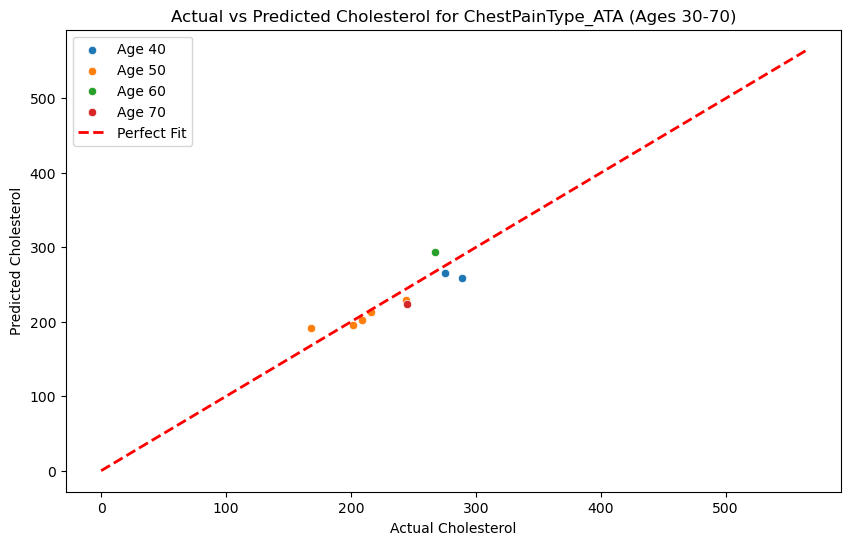

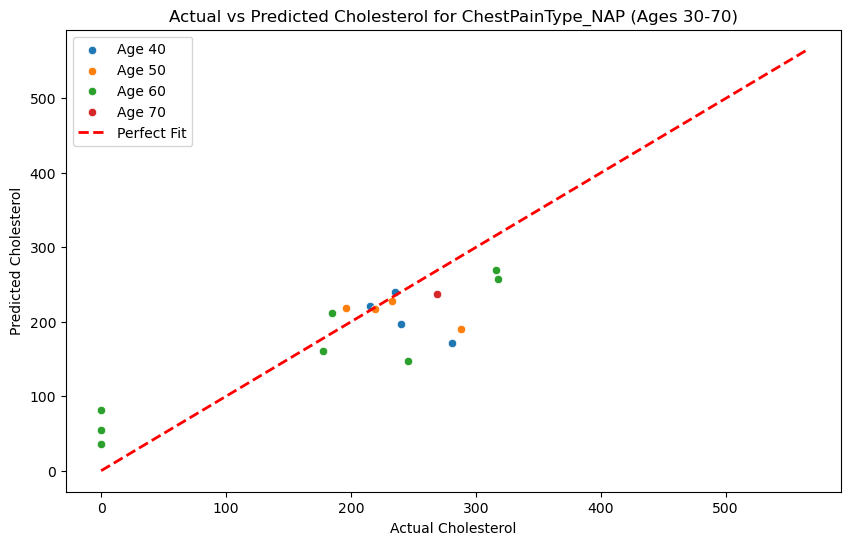

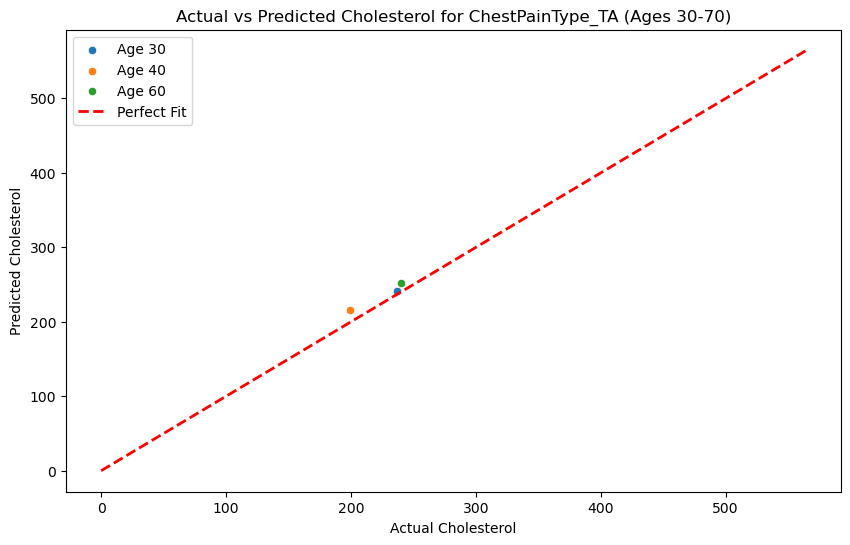

<Figure size 1200x800 with 0 Axes>

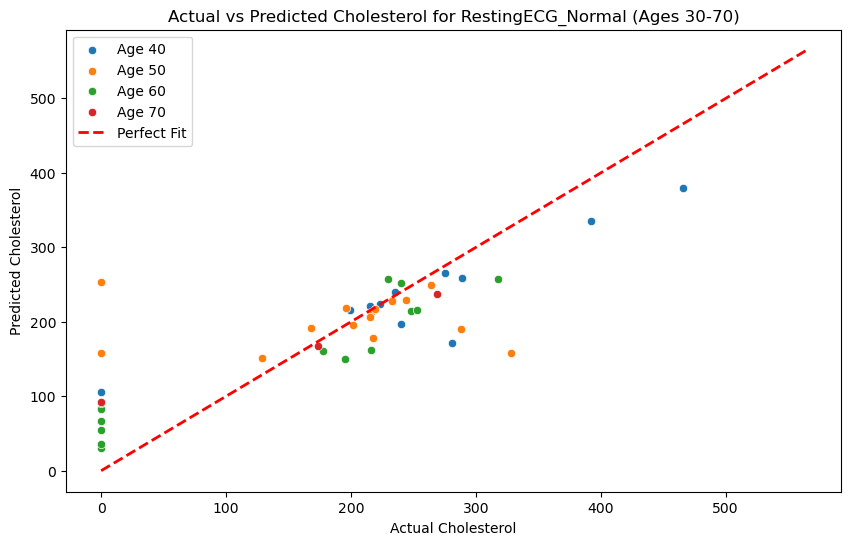

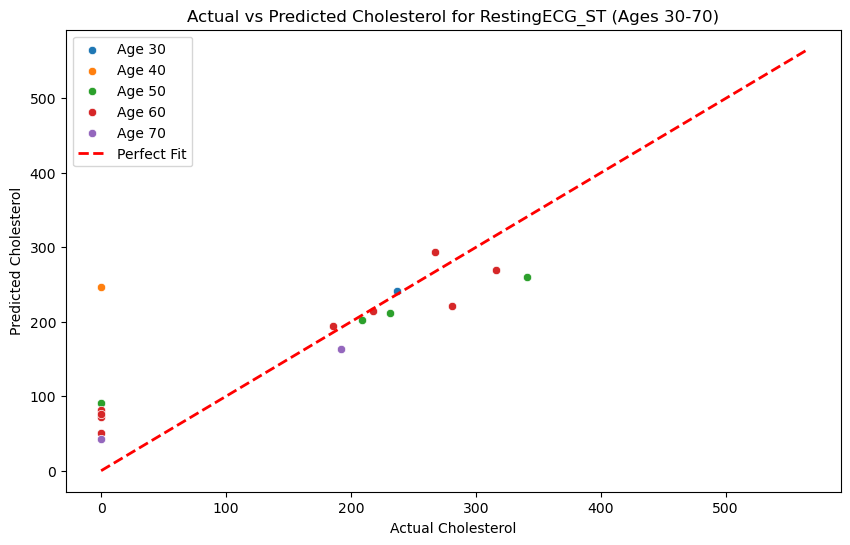

<Figure size 1200x800 with 0 Axes>

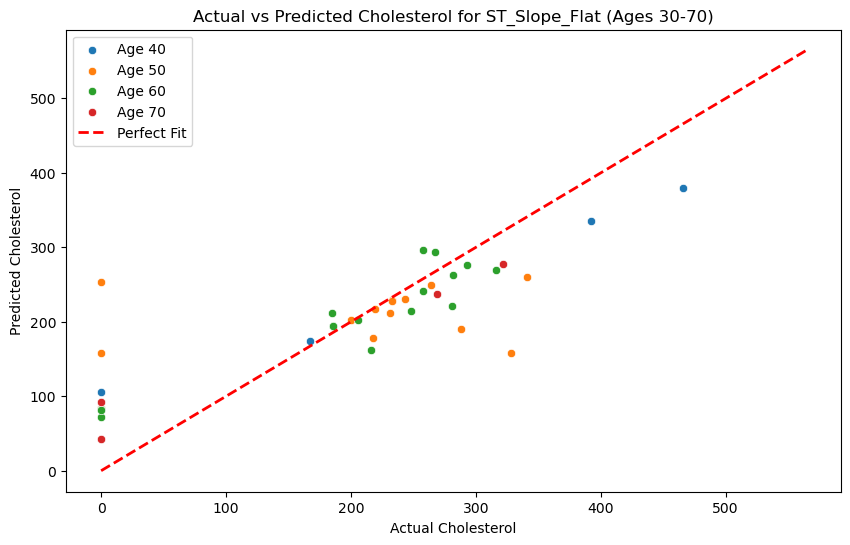

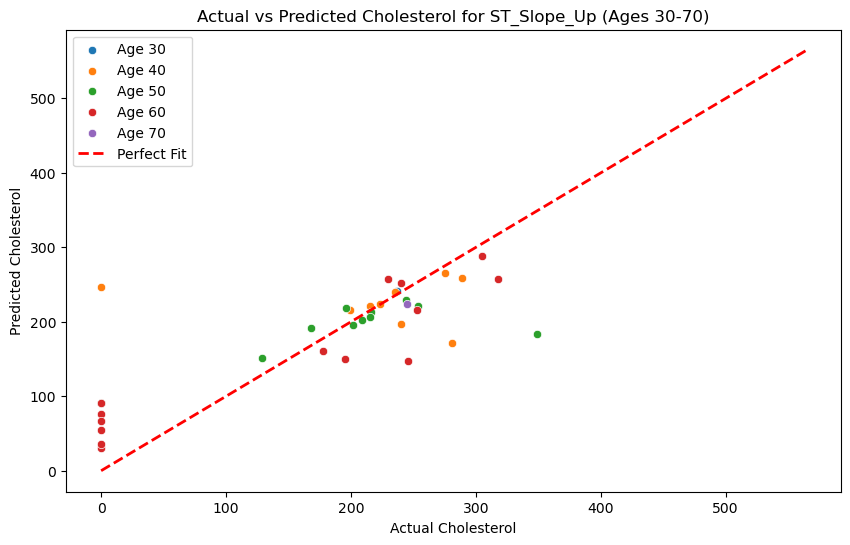

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
file_path = '/home/rajarajan/Desktop/LIL /dataset/heart.csv'
try:
    heart_df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found. Please check the path and try again.")

# Define a function to calculate the max heart rate threshold based on age
def calculate_max_hr(age):
    return 220 - age

# Apply threshold to classify if MaxHR is normal (below calculated threshold) or above normal
heart_df['MaxHR_Normal'] = heart_df.apply(lambda row: 1 if row['MaxHR'] <= calculate_max_hr(row['Age']) else 0, axis=1)

# Classify age into categories
def classify_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age <= 60:
        return 'Middle-Aged'
    else:
        return 'Elderly'

# Create a new column for age category
heart_df['Age_Group'] = heart_df['Age'].apply(classify_age)

# One-hot encoding for age group and other categorical features
heart_df = pd.get_dummies(heart_df, columns=['Age_Group', 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Check the available columns after encoding
print("Available columns after encoding:", heart_df.columns)

# Update the feature list based on available columns
available_columns = heart_df.columns

# Select only the available columns for X
features = ['MaxHR', 'MaxHR_Normal', 'Age'] + [
    col for col in ['Age_Group_Middle-Aged', 'Age_Group_Young',
                    'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                    'RestingECG_LVH', 'RestingECG_Normal', 
                    'ST_Slope_Flat', 'ST_Slope_Up'] if col in available_columns
]

# Prepare X and y based on the available columns
X = heart_df[features]
y = heart_df['Cholesterol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Convert R² score to a percentage
accuracy_percentage = r2 * 100
print(f'Accuracy of the model: {accuracy_percentage:.2f}%')

# Function to create separate plots for ChestPainType, RestingECG, and ST_Slope based on age
def plot_for_category(category, start_age, end_age, increment=10):
    plt.figure(figsize=(12, 8))
    unique_values = [col for col in available_columns if category in col]
    
    for value in unique_values:
        plt.figure(figsize=(10, 6))
        for age in range(start_age, end_age + 1, increment):
            # Filter data by age and category
            age_group_data = heart_df[(heart_df['Age'] == age) & (heart_df[value] == 1)]
            X_age_group = age_group_data[features]
            y_age_group = age_group_data['Cholesterol']

            if not age_group_data.empty:
                # Predict for the current age group
                y_pred_age = rf_regressor.predict(X_age_group)
                
                # Scatter plot of actual vs predicted Cholesterol for this age group and category
                sns.scatterplot(x=y_age_group, y=y_pred_age, label=f'Age {age}', marker='o')

        # Line representing perfect predictions
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')

        # Add labels and title
        plt.xlabel('Actual Cholesterol')
        plt.ylabel('Predicted Cholesterol')
        plt.title(f'Actual vs Predicted Cholesterol for {value} (Ages {start_age}-{end_age})')
        plt.legend()
        plt.show()

# Plot for ChestPainType, RestingECG, and ST_Slope categories for ages 30 to 70, with a difference of 10 years
plot_for_category('ChestPainType', 30, 70, increment=10)
plot_for_category('RestingECG', 30, 70, increment=10)
plot_for_category('ST_Slope', 30, 70, increment=10)
